Notebook to synthesize and modify the list of MIDI files to use

In [5]:
# imports
#import fluidsynth
import numpy as np
import matplotlib.pyplot as plt
import pretty_midi
import os
from scipy.io.wavfile import read as wavread, write as wavwrite
import copy

In [6]:
# constants
SYNTH_PATH = '/juice/scr/rjcaste/curis/lmd_full/synths'
MOD_MIDI_PATH = '/juice/scr/rjcaste/curis/lmd_full/modified_midis'
FILELIST_FNAME = 'filelist4.txt'
# altfilelist.txt was generated by restricting filelist.txt up to the point where
# the lengths of wav files surpassed 1 hour 30 minutes
pretty_midi.pretty_midi.MAX_TICK = 1e16

In [7]:
with open(FILELIST_FNAME) as f:
    fpaths = f.readlines()

In [8]:
for i, fpath in enumerate(fpaths):
    print(i)
    fpath = fpath.strip()
    print(fpath)
    midi = pretty_midi.PrettyMIDI(os.path.join('dataset', fpath))
    # set all the instruments to just be the violin
    midi.instruments = [ins for ins in midi.instruments if ins.program == 40 or ins.program == 41]
    
    midi.instruments[0].notes = sorted(midi.instruments[0].notes, key=lambda x: x.start)
    
    # we now split this up into 5 second snippets, and only take the snippets with at least one note
    
    last_note_time = midi.instruments[0].notes[-1].end
    
    num_clips = int(last_note_time // 5)
    
    for i in range(num_clips):
        start_time = 5 * i
        end_time = 5 * (i + 1)
        clipmidi = copy.deepcopy(midi)
        
        clipmidi.adjust_times(np.array([start_time, end_time]), np.array([0., 5.]))
        if len(clipmidi.instruments[0].notes) == 0:
            continue
        
        # now save this midi file
        synthed = clipmidi.synthesize(fs=16000)
        out_paths = []
        for basepath, ext in zip([MOD_MIDI_PATH, SYNTH_PATH], ['.midi', '.wav']):
            fname = os.path.splitext(fpath)[0] + '-{}'.format(start_time) + ext
            out_path = os.path.join(basepath, fname)
            out_dir = os.path.split(out_path)[0]
            if not(os.path.isdir(out_dir)):
                os.makedirs(out_dir)

            out_paths.append(out_path)

        print('saving MIDI to')
        print(out_paths[0])
        clipmidi.write(out_paths[0])
        print(out_paths[1])
        wavwrite(out_paths[1], 16000, synthed)

0
2/2b648cbab2691907aa2ec0a18ed6a791.mid
saving MIDI to
/juice/scr/rjcaste/curis/lmd_full/modified_midis/2/2b648cbab2691907aa2ec0a18ed6a791-0.midi
/juice/scr/rjcaste/curis/lmd_full/synths/2/2b648cbab2691907aa2ec0a18ed6a791-0.wav
saving MIDI to
/juice/scr/rjcaste/curis/lmd_full/modified_midis/2/2b648cbab2691907aa2ec0a18ed6a791-5.midi
/juice/scr/rjcaste/curis/lmd_full/synths/2/2b648cbab2691907aa2ec0a18ed6a791-5.wav
saving MIDI to
/juice/scr/rjcaste/curis/lmd_full/modified_midis/2/2b648cbab2691907aa2ec0a18ed6a791-10.midi
/juice/scr/rjcaste/curis/lmd_full/synths/2/2b648cbab2691907aa2ec0a18ed6a791-10.wav
saving MIDI to
/juice/scr/rjcaste/curis/lmd_full/modified_midis/2/2b648cbab2691907aa2ec0a18ed6a791-15.midi
/juice/scr/rjcaste/curis/lmd_full/synths/2/2b648cbab2691907aa2ec0a18ed6a791-15.wav
saving MIDI to
/juice/scr/rjcaste/curis/lmd_full/modified_midis/2/2b648cbab2691907aa2ec0a18ed6a791-20.midi
/juice/scr/rjcaste/curis/lmd_full/synths/2/2b648cbab2691907aa2ec0a18ed6a791-20.wav
saving MIDI t

/u/nlp/anaconda/main/anaconda3/envs/wavegenie37/lib/python3.7/site-packages/pretty_midi/pretty_midi.py:101: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


saving MIDI to
/juice/scr/rjcaste/curis/lmd_full/modified_midis/2/26198d291b9a0e712fe7f7f7f35bb380-15.midi
/juice/scr/rjcaste/curis/lmd_full/synths/2/26198d291b9a0e712fe7f7f7f35bb380-15.wav
saving MIDI to
/juice/scr/rjcaste/curis/lmd_full/modified_midis/2/26198d291b9a0e712fe7f7f7f35bb380-20.midi
/juice/scr/rjcaste/curis/lmd_full/synths/2/26198d291b9a0e712fe7f7f7f35bb380-20.wav
saving MIDI to
/juice/scr/rjcaste/curis/lmd_full/modified_midis/2/26198d291b9a0e712fe7f7f7f35bb380-25.midi
/juice/scr/rjcaste/curis/lmd_full/synths/2/26198d291b9a0e712fe7f7f7f35bb380-25.wav
saving MIDI to
/juice/scr/rjcaste/curis/lmd_full/modified_midis/2/26198d291b9a0e712fe7f7f7f35bb380-30.midi
/juice/scr/rjcaste/curis/lmd_full/synths/2/26198d291b9a0e712fe7f7f7f35bb380-30.wav
saving MIDI to
/juice/scr/rjcaste/curis/lmd_full/modified_midis/2/26198d291b9a0e712fe7f7f7f35bb380-35.midi
/juice/scr/rjcaste/curis/lmd_full/synths/2/26198d291b9a0e712fe7f7f7f35bb380-35.wav
saving MIDI to
/juice/scr/rjcaste/curis/lmd_full/m

In [9]:
fullmidi = copy.deepcopy(midi)

In [126]:
newmidi = copy.deepcopy(clipmidi)

In [130]:
newmidi.instruments[0].notes

[]

In [120]:
fullmidi.adjust_times(np.array([50, 55]), np.array([0, 5]))

In [129]:
fullmidi.instruments[0].notes

[Note(start=55.212088, end=55.394392, pitch=62, velocity=103),
 Note(start=55.420435, end=55.602739, pitch=62, velocity=103),
 Note(start=55.628783, end=55.811087, pitch=62, velocity=103),
 Note(start=55.837130, end=56.019434, pitch=64, velocity=103),
 Note(start=56.045478, end=56.227782, pitch=62, velocity=103),
 Note(start=56.253825, end=56.436129, pitch=67, velocity=103),
 Note(start=56.462173, end=56.644477, pitch=67, velocity=103),
 Note(start=56.670520, end=56.852824, pitch=67, velocity=103),
 Note(start=57.087215, end=57.269519, pitch=69, velocity=103),
 Note(start=57.295563, end=57.660171, pitch=69, velocity=103),
 Note(start=57.920605, end=58.102909, pitch=71, velocity=103),
 Note(start=58.128953, end=58.493561, pitch=74, velocity=103),
 Note(start=58.649821, end=58.740973, pitch=62, velocity=103),
 Note(start=58.753995, end=58.936299, pitch=62, velocity=103),
 Note(start=58.962343, end=59.144647, pitch=62, velocity=103),
 Note(start=59.170690, end=59.352994, pitch=64, velocit

In [89]:
newmidi.adjust_times(np.array([50., 60.]), np.array([0., 10.]))

In [90]:
newmidi.instruments[0].notes

[Note(start=0.149176, end=0.298429, pitch=75, velocity=90),
 Note(start=0.298429, end=0.447683, pitch=77, velocity=90),
 Note(start=0.447683, end=0.596936, pitch=75, velocity=90),
 Note(start=0.596936, end=0.895443, pitch=75, velocity=90),
 Note(start=0.895443, end=1.044697, pitch=70, velocity=90),
 Note(start=1.044697, end=1.193950, pitch=70, velocity=90),
 Note(start=1.193950, end=1.343204, pitch=67, velocity=90),
 Note(start=1.343204, end=1.492457, pitch=70, velocity=90),
 Note(start=1.492457, end=1.641711, pitch=70, velocity=90),
 Note(start=1.641711, end=1.790964, pitch=80, velocity=90),
 Note(start=1.790964, end=1.940218, pitch=79, velocity=90),
 Note(start=1.940218, end=2.089471, pitch=77, velocity=90),
 Note(start=2.089471, end=2.238725, pitch=75, velocity=90),
 Note(start=2.238725, end=2.387978, pitch=77, velocity=90),
 Note(start=2.387978, end=2.537232, pitch=79, velocity=90),
 Note(start=2.537232, end=2.686485, pitch=75, velocity=90),
 Note(start=2.686485, end=2.835739, pitc

In [48]:
clipmidi.get_end_time()

207.280636875

In [55]:
clipmidi.adjust_times(np.array([205., 210.]), np.array([0., 5.]))

In [58]:
clipmidi.instruments[0].control_changes

[]

In [42]:
synthed = clipmidi.fluidsynth(fs=16000)

In [44]:
synthed.shape

(3332491,)

In [25]:
newmidi = copy.deepcopy(midi)

In [17]:
dir(midi)

['_PrettyMIDI__tick_to_time',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_instruments',
 '_load_metadata',
 '_load_tempo_changes',
 '_tick_scales',
 '_update_tick_to_time',
 'adjust_times',
 'estimate_beat_start',
 'estimate_tempi',
 'estimate_tempo',
 'fluidsynth',
 'get_beats',
 'get_chroma',
 'get_downbeats',
 'get_end_time',
 'get_onsets',
 'get_piano_roll',
 'get_pitch_class_histogram',
 'get_pitch_class_transition_matrix',
 'get_tempo_changes',
 'instruments',
 'key_signature_changes',
 'lyrics',
 'remove_invalid_notes',
 'resolution',
 'synthesize',
 'tick_to_time',
 'time_signature_changes',
 'time_to_tick',
 'write']

In [19]:
dir(midi.instruments[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'control_changes',
 'fluidsynth',
 'get_chroma',
 'get_end_time',
 'get_onsets',
 'get_piano_roll',
 'get_pitch_class_histogram',
 'get_pitch_class_transition_matrix',
 'is_drum',
 'name',
 'notes',
 'pitch_bends',
 'program',
 'remove_invalid_notes',
 'synthesize']

In [23]:
midi.instruments[0].control_changes

[ControlChange(number=7, value=127, time=0.348011),
 ControlChange(number=10, value=71, time=0.348011),
 ControlChange(number=91, value=36, time=1.036932),
 ControlChange(number=93, value=64, time=1.122159),
 ControlChange(number=1, value=16, time=1.207386)]

In [16]:
midi.instruments[0].notes

[Note(start=0.000000, end=0.653409, pitch=60, velocity=54),
 Note(start=0.681818, end=1.171875, pitch=60, velocity=52),
 Note(start=1.193181, end=1.356534, pitch=60, velocity=49),
 Note(start=1.363636, end=2.017045, pitch=60, velocity=54),
 Note(start=2.045454, end=2.698863, pitch=60, velocity=52),
 Note(start=2.727272, end=3.082386, pitch=60, velocity=54),
 Note(start=3.749999, end=4.048294, pitch=62, velocity=52),
 Note(start=4.090908, end=4.744317, pitch=64, velocity=57),
 Note(start=4.772726, end=5.262783, pitch=64, velocity=55),
 Note(start=5.284089, end=5.419033, pitch=64, velocity=52),
 Note(start=5.454544, end=6.079544, pitch=60, velocity=57),
 Note(start=6.136362, end=6.761362, pitch=57, velocity=55),
 Note(start=6.818180, end=8.920453, pitch=56, velocity=57),
 Note(start=9.545453, end=10.035510, pitch=60, velocity=91),
 Note(start=10.056816, end=10.220169, pitch=60, velocity=88),
 Note(start=10.227271, end=10.852271, pitch=60, velocity=93),
 Note(start=10.909089, end=11.39914

In [82]:
regions

array([[ 0, 35]])

In [81]:
len(midi.instruments[0].notes)

36

In [61]:
midi.instruments[0].notes

[Note(start=0.000000, end=0.218750, pitch=60, velocity=111),
 Note(start=0.250000, end=0.687500, pitch=63, velocity=111),
 Note(start=0.750000, end=0.968750, pitch=60, velocity=111),
 Note(start=3.000000, end=3.218750, pitch=63, velocity=111),
 Note(start=3.250000, end=3.468750, pitch=61, velocity=111),
 Note(start=3.500000, end=3.718750, pitch=61, velocity=111),
 Note(start=3.750000, end=3.968750, pitch=61, velocity=111),
 Note(start=4.000000, end=4.218750, pitch=61, velocity=111),
 Note(start=4.250000, end=4.468750, pitch=60, velocity=111),
 Note(start=4.500000, end=4.718750, pitch=56, velocity=111),
 Note(start=4.750000, end=4.968750, pitch=60, velocity=111),
 Note(start=5.000000, end=5.218750, pitch=61, velocity=111),
 Note(start=5.250000, end=5.468750, pitch=60, velocity=111),
 Note(start=5.500000, end=5.718750, pitch=60, velocity=111),
 Note(start=5.750000, end=5.968750, pitch=63, velocity=111),
 Note(start=6.000000, end=6.218750, pitch=63, velocity=111),
 Note(start=6.250000, en

In [77]:
if not(instrument_is_monophonic(midi.instruments[0])):
    print('hi1')
else:
    print('hi2')

Note(start=0.000000, end=0.218750, pitch=60, velocity=111)
Note(start=0.250000, end=0.687500, pitch=63, velocity=111)
Note(start=0.750000, end=0.968750, pitch=60, velocity=111)
Note(start=3.000000, end=3.218750, pitch=63, velocity=111)
Note(start=3.250000, end=3.468750, pitch=61, velocity=111)
Note(start=3.500000, end=3.718750, pitch=61, velocity=111)
Note(start=3.750000, end=3.968750, pitch=61, velocity=111)
Note(start=4.000000, end=4.218750, pitch=61, velocity=111)
Note(start=4.250000, end=4.468750, pitch=60, velocity=111)
Note(start=4.500000, end=4.718750, pitch=56, velocity=111)
Note(start=4.750000, end=4.968750, pitch=60, velocity=111)
Note(start=5.000000, end=5.218750, pitch=61, velocity=111)
Note(start=5.250000, end=5.468750, pitch=60, velocity=111)
Note(start=5.500000, end=5.718750, pitch=60, velocity=111)
Note(start=5.750000, end=5.968750, pitch=63, velocity=111)
Note(start=6.000000, end=6.218750, pitch=63, velocity=111)
Note(start=6.250000, end=6.468750, pitch=61, velocity=11

In [15]:
midi.write('test')

In [16]:
os.listdir()

['out.wav',
 '6',
 'filter.ipynb',
 '.ipynb_checkpoints',
 'synthesized.wav',
 'test',
 'b',
 'f',
 '5',
 '0',
 'd',
 '8',
 'Untitled.ipynb',
 '3',
 '2',
 '9',
 'e',
 '~',
 'c',
 '7',
 'a',
 '4',
 '1',
 'filelist.txt',
 'modified_midis']

In [157]:
os.path.split(out_path)

('~/curis/lmd_full/modified_midis/6', '6dcdacb9280dc375b1c4f0bd8440d883.wav')

In [153]:
os.path.splitext(fpath)[0]

'6/6dcdacb9280dc375b1c4f0bd8440d883/.wav'

In [139]:
midi.get_end_time()

140.44250009375003

In [137]:
midi.instruments[0].control_changes

[ControlChange(number=7, value=95, time=0.283591),
 ControlChange(number=10, value=84, time=0.283591),
 ControlChange(number=7, value=101, time=0.289379),
 ControlChange(number=91, value=64, time=0.428280),
 ControlChange(number=93, value=64, time=0.567182),
 ControlChange(number=1, value=16, time=0.706084),
 ControlChange(number=11, value=111, time=26.657561),
 ControlChange(number=11, value=112, time=43.601071),
 ControlChange(number=11, value=113, time=43.656626),
 ControlChange(number=11, value=114, time=43.767737),
 ControlChange(number=11, value=115, time=43.823293),
 ControlChange(number=11, value=116, time=43.906626),
 ControlChange(number=11, value=117, time=43.962182),
 ControlChange(number=11, value=118, time=44.073293),
 ControlChange(number=11, value=119, time=44.156626),
 ControlChange(number=11, value=120, time=44.378848),
 ControlChange(number=11, value=119, time=44.406626),
 ControlChange(number=11, value=118, time=44.601071),
 ControlChange(number=11, value=117, time=

In [145]:
synthed = midi.fluidsynth(fs=16000)

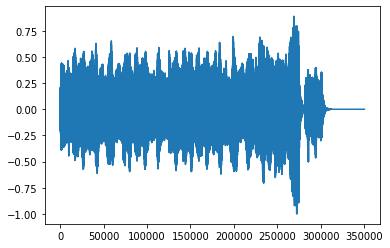

In [146]:
plt.plot(synthed[:350000])

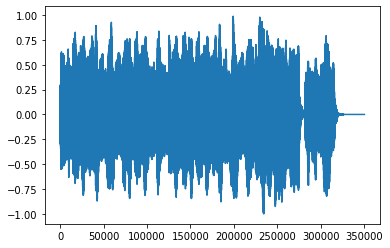

In [143]:
plt.plot(synthed[:350000])

In [68]:
def instrument_is_monophonic(ins):
    # Ensure sorted
    notes = ins.notes
    last_note_start = -1
    ins.notes = sorted(ins.notes, key=lambda x: x.start)
    for n in notes:
        print(n)
        assert n.start >= last_note_start
        last_note_start = n.start

    monophonic = True
    for i in range(len(notes) - 1):
        n0 = notes[i]
        n1 = notes[i + 1]
        if n0.end > n1.start:
            monophonic = False
            break
    return monophonic

In [116]:
gaps < 1

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [117]:
contiguous_regions(gaps < 1)

array([[ 0,  2],
       [ 3, 17],
       [18, 20],
       [21, 35]])

In [101]:
np.array(notes)[np.where(gaps > 1)[0]]

array([Note(start=124.000000, end=124.218750, pitch=60, velocity=111),
       Note(start=129.750000, end=130.187500, pitch=60, velocity=111),
       Note(start=132.000000, end=132.218750, pitch=60, velocity=111)],
      dtype=object)

In [65]:
violin.notes = sorted(violin.notes, key=lambda x: x.start)

In [78]:
midi.estimate_beat_start()

123.5

In [79]:
midi.get_onsets()

array([123.25, 123.5 , 124.  , 126.25, 126.5 , 126.75, 127.  , 127.25,
       127.5 , 127.75, 128.  , 128.25, 128.5 , 128.75, 129.  , 129.25,
       129.5 , 129.75, 131.25, 131.5 , 132.  , 134.25, 134.5 , 134.75,
       135.  , 135.25, 135.5 , 135.75, 136.  , 136.25, 136.5 , 136.75,
       137.  , 137.25, 137.5 , 137.75])

In [75]:
gaps

array([0.03125, 0.0625 , 2.03125, 0.03125, 0.03125, 0.03125, 0.03125,
       0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125,
       0.03125, 0.03125, 0.03125, 1.0625 , 0.03125, 0.0625 , 2.03125,
       0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125,
       0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.03125])

In [70]:
instrument_is_monophonic(violin)

True

In [69]:
violin = [ins for ins in midi.instruments if ins.program == 41][0]

In [7]:
midi.instruments = [violin]

In [15]:
midi.get_end_time()

240.59895536666664

In [42]:
violin_notes = midi.instruments[4].notes

In [45]:
timings = np.array([[note.start, note.end] for note in violin_notes])

In [32]:
midi.estimate_beat_start()

4.355071374999999

In [36]:
midi.get_downbeats()

array([  0.        ,   3.47826   ,   6.95652   ,  10.43478   ,
        13.91304   ,  17.3913    ,  20.86956   ,  24.34782   ,
        27.82608   ,  31.30434   ,  34.7826    ,  38.26086   ,
        41.73912   ,  45.21738   ,  48.69564   ,  52.1739    ,
        55.65216   ,  59.13042   ,  62.60868   ,  66.08694   ,
        69.5652    ,  73.04346   ,  76.52172   ,  79.99998   ,
        83.47824   ,  86.9565    ,  90.43476   ,  93.91302   ,
        97.39128   , 100.86954   , 104.3478    , 107.82606   ,
       111.30432   , 114.78258   , 118.26084   , 121.7391    ,
       125.21736   , 128.69562   , 132.17388   , 135.65214   ,
       139.1304    , 142.60866   , 146.08692   , 149.56518   ,
       153.04344   , 156.5217    , 159.99996   , 163.47822   ,
       166.95648   , 170.43474   , 173.913     , 177.39126   ,
       180.86952   , 184.34778   , 187.82604   , 191.3043    ,
       194.78256   , 198.26082   , 201.73908   , 205.21734   ,
       208.6956    , 212.17386   , 215.65212   , 219.13

In [29]:
midi.instruments

[Instrument(program=1, is_drum=False, name="Piano"),
 Instrument(program=35, is_drum=False, name="Bass"),
 Instrument(program=48, is_drum=False, name="String1"),
 Instrument(program=49, is_drum=False, name="String2"),
 Instrument(program=41, is_drum=False, name="String3"),
 Instrument(program=73, is_drum=False, name="Melody"),
 Instrument(program=73, is_drum=False, name="Echo"),
 Instrument(program=25, is_drum=False, name="Guitar1"),
 Instrument(program=27, is_drum=False, name="Guitar2"),
 Instrument(program=25, is_drum=False, name="Guitar3"),
 Instrument(program=0, is_drum=True, name="Drums"),
 Instrument(program=119, is_drum=False, name="Reverse Cymbal")]

(array([32.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.]),
 array([0.03125, 0.23125, 0.43125, 0.63125, 0.83125, 1.03125, 1.23125,
        1.43125, 1.63125, 1.83125, 2.03125]),
 <a list of 10 Patch objects>)

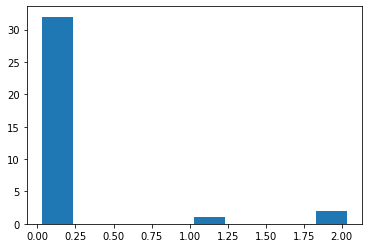

In [91]:
plt.hist(gaps)

In [71]:
midi.instruments = [violin]

In [76]:
synthed = midi.fluidsynth(fs=16000)

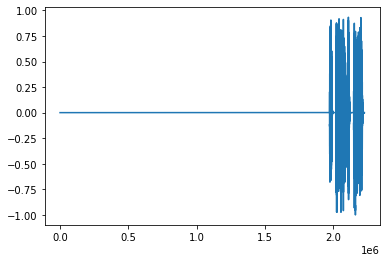

In [77]:
plt.plot(synthed)

In [80]:
midi.get_piano_roll(fs=16000).shape

(128, 3970958)

In [71]:
midi.fluidsynth()

ImportError: fluidsynth() was called but pyfluidsynth is not installed.

In [68]:
fluidsynth

<module 'fluidsynth' from '/home/mpcr/anaconda3/envs/wavegenie37/lib/python3.7/site-packages/fluidsynth.py'>

In [37]:
import itertools
import os

import pretty_midi
pretty_midi.pretty_midi.MAX_TICK = 1e16
import random

midi = pretty_midi.PrettyMIDI(fpath.strip())

In [38]:
midi.instruments

[Instrument(program=64, is_drum=False, name="Soprano"),
 Instrument(program=56, is_drum=False, name="Soprano"),
 Instrument(program=40, is_drum=False, name="Soprano"),
 Instrument(program=85, is_drum=False, name="Soprano"),
 Instrument(program=65, is_drum=False, name="Alto"),
 Instrument(program=60, is_drum=False, name="Alto"),
 Instrument(program=40, is_drum=False, name="Alto"),
 Instrument(program=88, is_drum=False, name="Alto"),
 Instrument(program=66, is_drum=False, name="Tenor"),
 Instrument(program=57, is_drum=False, name="Tenor"),
 Instrument(program=41, is_drum=False, name="Tenor"),
 Instrument(program=52, is_drum=False, name="Tenor"),
 Instrument(program=67, is_drum=False, name="Bass"),
 Instrument(program=58, is_drum=False, name="Bass"),
 Instrument(program=42, is_drum=False, name="Bass"),
 Instrument(program=91, is_drum=False, name="Bass"),
 Instrument(program=0, is_drum=False, name="Piano (hi)"),
 Instrument(program=0, is_drum=False, name="Piano (lo)")]

In [42]:
notes = [ins for ins in midi.instruments if ins.program == 41][0].notes

In [45]:
notes

[Note(start=107.005208, end=107.229167, pitch=60, velocity=94),
 Note(start=107.515625, end=107.718750, pitch=64, velocity=92),
 Note(start=107.994792, end=108.473958, pitch=60, velocity=94),
 Note(start=108.994792, end=109.343750, pitch=65, velocity=94),
 Note(start=109.380208, end=109.479167, pitch=65, velocity=89),
 Note(start=109.505208, end=109.703125, pitch=65, velocity=80),
 Note(start=109.750000, end=109.989583, pitch=65, velocity=77),
 Note(start=109.994792, end=110.473958, pitch=60, velocity=94),
 Note(start=111.005208, end=111.229167, pitch=55, velocity=94),
 Note(start=111.515625, end=111.718750, pitch=60, velocity=92),
 Note(start=111.994792, end=112.473958, pitch=64, velocity=94),
 Note(start=112.505208, end=112.833333, pitch=64, velocity=92),
 Note(start=112.869792, end=112.968750, pitch=64, velocity=89),
 Note(start=112.994792, end=113.473958, pitch=59, velocity=94),
 Note(start=114.505208, end=114.963542, pitch=64, velocity=94),
 Note(start=114.994792, end=115.208333, 

In [48]:
notes_ = np.array([[note.start, note.pitch]  for note in notes])

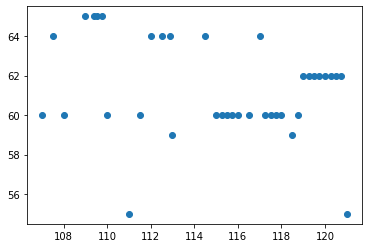

In [50]:
plt.scatter(notes_[:,0], notes_[:, 1])

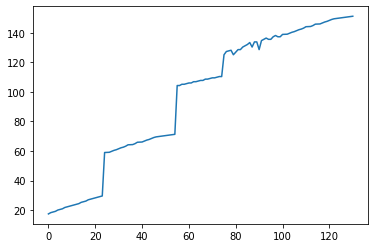

In [12]:
import matplotlib.pyplot as plt
plt.plot([17.387676812499997, 18.253618624999998, 18.706517062499994, 19.134053187499998, 20.003618187499995, 20.438400687499996, 20.869559999999996, 21.739124999999994, 22.181153874999996, 22.619559562499994, 23.050718874999994, 23.474631812499997, 23.905791124999993, 24.358689562499993, 25.224631374999994, 25.652167499999994, 26.079703624999993, 26.949268624999995, 27.391297499999993, 27.818833624999993, 28.264485687499995, 28.699268187499992, 29.141297062499994, 29.557963624999992, 58.985492499999985, 59.054333062499985, 59.13404318749999, 59.79346331249999, 60.43114431249999, 60.87679637499999, 61.52534693749999, 62.184767062499986, 62.601433624999984, 63.257230562499984, 64.20288249999999, 64.28259262499999, 64.35505637499999, 64.99273737499999, 65.94201249999999, 66.01447624999999, 66.09780956249999, 66.73186737499998, 67.39128749999999, 67.81882362499998, 68.48186693749999, 69.12679431249998, 69.57244637499998, 69.78983762499999, 70.00722887499998, 70.22099693749999, 70.42751862499999, 70.64853306249998, 70.88041706249999, 71.08693874999999, 71.30795318749999, 104.35504637499997, 104.34779999999998, 105.21374181249998, 105.21011862499998, 105.65939387499998, 106.08330681249998, 106.09779956249997, 106.94924862499998, 106.96011818749997, 107.39490068749998, 107.81881362499998, 107.81881362499998, 108.68837862499997, 108.69924818749998, 109.12316112499998, 109.56156681249998, 109.56881318749998, 110.00721887499998, 110.44562456249997, 110.43837818749998, 125.21373681249997, 127.39851887499998, 127.81880862499997, 128.26446068749996, 125.21011362499998, 126.96735956249998, 128.69199681249998, 128.69561999999996, 130.42750362499999, 131.30793818749999, 132.16663362499997, 133.47822749999997, 130.43474999999998, 133.90938681249997, 133.90938681249997, 128.69199681249998, 134.79344456249999, 135.64489362499998, 136.51808181249996, 135.64851681249996, 135.65938637499997, 137.38402362499997, 138.26083499999996, 137.38764681249998, 137.39489318749997, 138.98909568749997, 139.06518262499998, 139.13764637499997, 139.78982012499998, 140.43112431249997, 140.86952999999997, 141.52532693749998, 142.17387749999997, 142.60141362499996, 143.25358737499997, 144.20286249999998, 144.28257262499997, 144.35865956249998, 144.99996374999998, 145.94199249999997, 146.01083306249996, 146.07967362499997, 146.74634012499996, 147.38402112499998, 147.83329637499997, 148.48909331249996, 149.12315112499996, 149.57242637499996, 149.79344081249997, 149.99996249999998, 150.22822331249998, 150.43836818749998, 150.65938262499998, 150.88039706249998, 151.07967237499997, 151.29706362499996])

In [13]:
notes = [17.387676812499997, 18.253618624999998, 18.706517062499994, 19.134053187499998, 20.003618187499995, 20.438400687499996, 20.869559999999996, 21.739124999999994, 22.181153874999996, 22.619559562499994, 23.050718874999994, 23.474631812499997, 23.905791124999993, 24.358689562499993, 25.224631374999994, 25.652167499999994, 26.079703624999993, 26.949268624999995, 27.391297499999993, 27.818833624999993, 28.264485687499995, 28.699268187499992, 29.141297062499994, 29.557963624999992, 58.985492499999985, 59.054333062499985, 59.13404318749999, 59.79346331249999, 60.43114431249999, 60.87679637499999, 61.52534693749999, 62.184767062499986, 62.601433624999984, 63.257230562499984, 64.20288249999999, 64.28259262499999, 64.35505637499999, 64.99273737499999, 65.94201249999999, 66.01447624999999, 66.09780956249999, 66.73186737499998, 67.39128749999999, 67.81882362499998, 68.48186693749999, 69.12679431249998, 69.57244637499998, 69.78983762499999, 70.00722887499998, 70.22099693749999, 70.42751862499999, 70.64853306249998, 70.88041706249999, 71.08693874999999, 71.30795318749999, 104.35504637499997, 104.34779999999998, 105.21374181249998, 105.21011862499998, 105.65939387499998, 106.08330681249998, 106.09779956249997, 106.94924862499998, 106.96011818749997, 107.39490068749998, 107.81881362499998, 107.81881362499998, 108.68837862499997, 108.69924818749998, 109.12316112499998, 109.56156681249998, 109.56881318749998, 110.00721887499998, 110.44562456249997, 110.43837818749998, 125.21373681249997, 127.39851887499998, 127.81880862499997, 128.26446068749996, 125.21011362499998, 126.96735956249998, 128.69199681249998, 128.69561999999996, 130.42750362499999, 131.30793818749999, 132.16663362499997, 133.47822749999997, 130.43474999999998, 133.90938681249997, 133.90938681249997, 128.69199681249998, 134.79344456249999, 135.64489362499998, 136.51808181249996, 135.64851681249996, 135.65938637499997, 137.38402362499997, 138.26083499999996, 137.38764681249998, 137.39489318749997, 138.98909568749997, 139.06518262499998, 139.13764637499997, 139.78982012499998, 140.43112431249997, 140.86952999999997, 141.52532693749998, 142.17387749999997, 142.60141362499996, 143.25358737499997, 144.20286249999998, 144.28257262499997, 144.35865956249998, 144.99996374999998, 145.94199249999997, 146.01083306249996, 146.07967362499997, 146.74634012499996, 147.38402112499998, 147.83329637499997, 148.48909331249996, 149.12315112499996, 149.57242637499996, 149.79344081249997, 149.99996249999998, 150.22822331249998, 150.43836818749998, 150.65938262499998, 150.88039706249998, 151.07967237499997, 151.29706362499996]

In [21]:
import numpy as np
notes = np.array(sorted(notes))

In [29]:
np.where((notes[1:] - notes[:-1]) <= 0)

(array([65, 81, 89]),)

In [31]:
notes[64:67]

array([107.39490069, 107.81881362, 107.81881362])